OBTENER LAS VISUALIZACIONES

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from nltk.stem import WordNetLemmatizer
import nltk

# Descargar los recursos necesarios para lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

# Crear el objeto lemmatizer
lemmatizer = WordNetLemmatizer()

# Función para preprocesar el texto
def preprocesar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)
    texto = re.sub(r'<.*?>+', '', texto)
    texto = re.sub(r'[%s]' % re.escape(string.punctuation), '', texto)
    texto = re.sub(r'\n', '', texto)
    texto = re.sub(r'\w*\d\w*', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    texto = ' '.join([lemmatizer.lemmatize(word) for word in texto.split()])
    return texto

# Cargar el dataset y preprocesar
df = pd.read_csv('Combined_Balanced_Data(3).csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(subset=['statement'], inplace=True)

# Aplicar preprocesamiento al texto
df['cleaned_statement'] = df['statement'].apply(preprocesar_texto)

# Mostrar la cantidad de registros por clase
print("Número de registros por clase:\n", df['status'].value_counts())

# 1. Gráfico de barras - Cantidad de registros por clase
plt.figure(figsize=(10, 6))
sns.barplot(x=df['status'].value_counts().index, y=df['status'].value_counts().values, palette="magma")
plt.title('Cantidad de registros por clase', fontsize=18, fontweight='bold', color='darkred')
plt.xlabel('Clase', fontsize=14, fontweight='bold')
plt.ylabel('Número de registros', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 2. Nubes de Palabras por Clase
status = df['status'].unique()
n = len(status)

plt.figure(figsize=(12, 8))
for i in range(n):
    text = ' '.join(df[df['status'] == status[i]].statement)
    cloud = WordCloud(background_color='white', colormap='inferno', contour_color='black', contour_width=1).generate(text)
    plt.subplot(3, 3, i+1)
    plt.imshow(cloud, interpolation='bilinear')
    plt.title(status[i], fontsize=14, fontweight='bold')
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.suptitle('Nubes de palabras por clase', fontsize=20, fontweight='bold', color='darkblue')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 3. Distribución de la Longitud de los Textos
df['text_length'] = df['statement'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color='green')
plt.title('Distribución de la longitud de los textos', fontsize=18, fontweight='bold', color='darkgreen')
plt.xlabel('Número de palabras', fontsize=14, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold')
plt.show()

# 4. Distribución de la Longitud de los Textos por Clase
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='text_length', data=df, palette='coolwarm')
plt.title('Distribución de la longitud de los textos por clases', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Clase', fontsize=14, fontweight='bold')
plt.ylabel('Número de Palabras', fontsize=14, fontweight='bold')
plt.show()

# 5. Palabras más Comunes usando TF-IDF sin Stopwords
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df['statement'])

# Obtener las palabras más representativas
tfidf_words = vectorizer.get_feature_names_out()
word_freq = X_tfidf.sum(axis=0).A1
word_freq_df = pd.DataFrame({'Palabra': tfidf_words, 'Frecuencia': word_freq})

# Ordenar por frecuencia y seleccionar las 20 palabras más comunes
word_freq_df = word_freq_df.sort_values(by='Frecuencia', ascending=False).head(20)

# Visualizar las palabras más comunes sin stopwords
plt.figure(figsize=(12, 6))
sns.barplot(x='Palabra', y='Frecuencia', data=word_freq_df, palette='viridis')
plt.title('Palabras más comunes sin stopwords', fontsize=18, fontweight='bold', color='darkorange')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold')
plt.show()


ENTRENAMOS TODOS LOS MODELOS SIN VISUALIZACIONES


--- XGBoost ---


C:\Users\Alvaro\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:31:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Alvaro\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:38:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Alvaro\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:45:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Alvaro\anaconda3\Lib\site-packa

Precisión promedio de validación cruzada: 0.8975
Desviación estándar: 0.0277


C:\Users\Alvaro\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:05:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Precisión: 0.8546
Precisión ponderada: 0.8574
Recall ponderado: 0.8546
F1-score ponderado: 0.8536

Reporte de Clasificación en el conjunto de test:
                       precision    recall  f1-score   support

             Anxiety       0.94      0.89      0.91      2823
             Bipolar       0.84      0.74      0.78       500
          Depression       0.89      0.78      0.83      3172
              Normal       0.84      0.94      0.89      3140
Personality disorder       0.74      0.49      0.59       179
              Stress       0.80      0.80      0.80      1320
            Suicidal       0.80      0.88      0.84      2900

            accuracy                           0.85     14034
           macro avg       0.83      0.79      0.81     14034
        weighted avg       0.86      0.85      0.85     14034



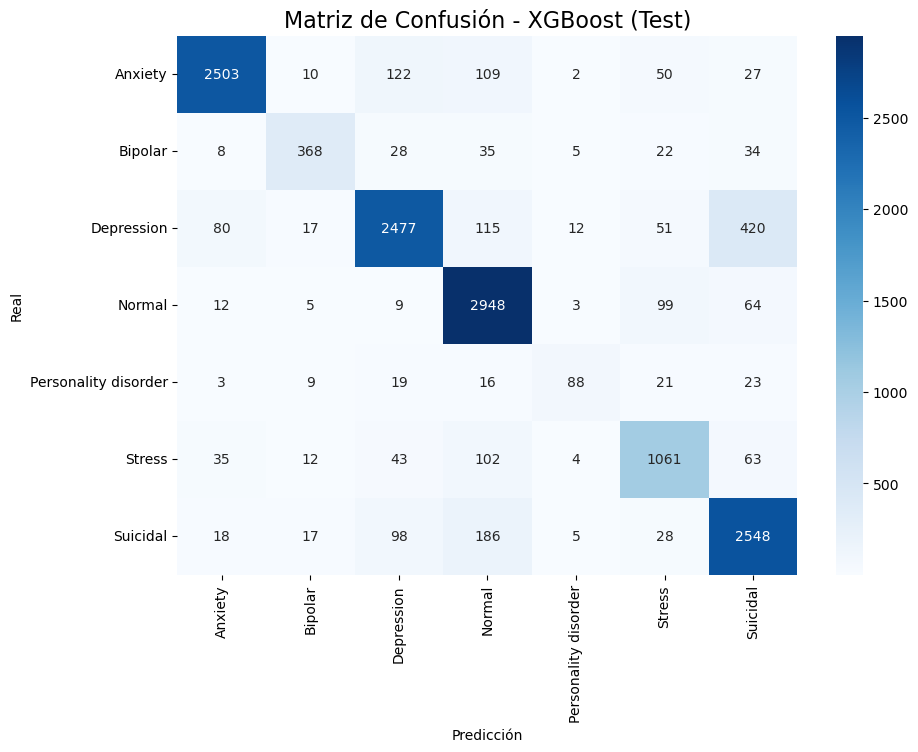


--- Random Forest ---
Precisión promedio de validación cruzada: 0.8846
Desviación estándar: 0.0307
Precisión: 0.8026
Precisión ponderada: 0.8153
Recall ponderado: 0.8026
F1-score ponderado: 0.7976

Reporte de Clasificación en el conjunto de test:
                       precision    recall  f1-score   support

             Anxiety       0.87      0.87      0.87      2823
             Bipolar       0.70      0.48      0.57       500
          Depression       0.88      0.73      0.80      3172
              Normal       0.83      0.91      0.87      3140
Personality disorder       0.81      0.09      0.17       179
              Stress       0.86      0.63      0.73      1320
            Suicidal       0.66      0.88      0.76      2900

            accuracy                           0.80     14034
           macro avg       0.80      0.66      0.68     14034
        weighted avg       0.82      0.80      0.80     14034



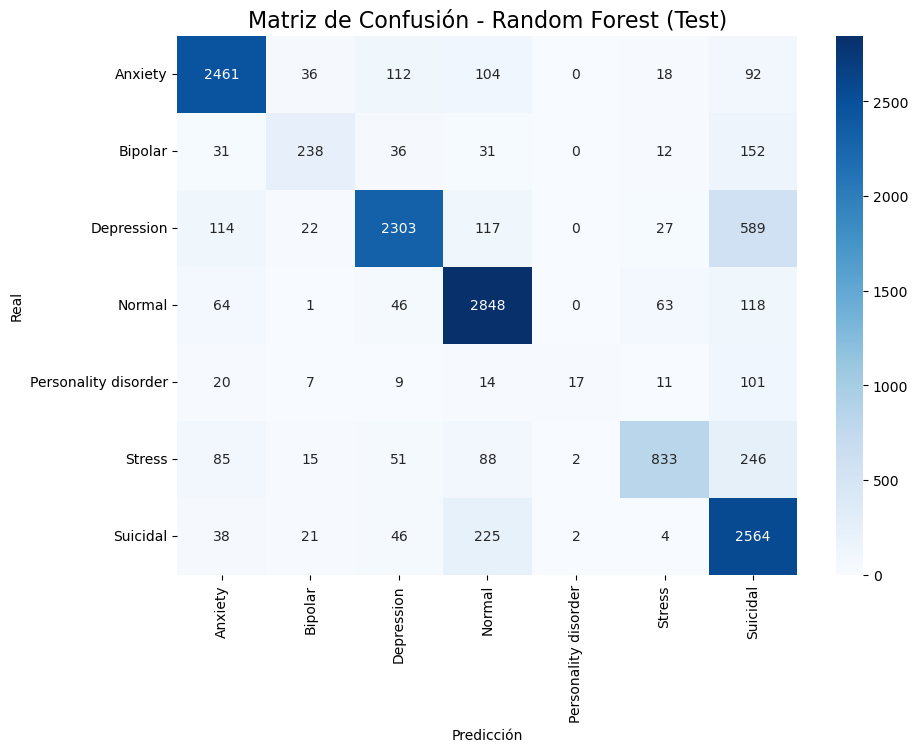


--- Logistic Regression ---
Precisión promedio de validación cruzada: 0.8885
Desviación estándar: 0.0076
Precisión: 0.8480
Precisión ponderada: 0.8539
Recall ponderado: 0.8480
F1-score ponderado: 0.8489

Reporte de Clasificación en el conjunto de test:
                       precision    recall  f1-score   support

             Anxiety       0.94      0.89      0.91      2823
             Bipolar       0.69      0.77      0.73       500
          Depression       0.89      0.76      0.82      3172
              Normal       0.86      0.91      0.89      3140
Personality disorder       0.47      0.70      0.56       179
              Stress       0.78      0.81      0.79      1320
            Suicidal       0.81      0.87      0.84      2900

            accuracy                           0.85     14034
           macro avg       0.78      0.82      0.79     14034
        weighted avg       0.85      0.85      0.85     14034



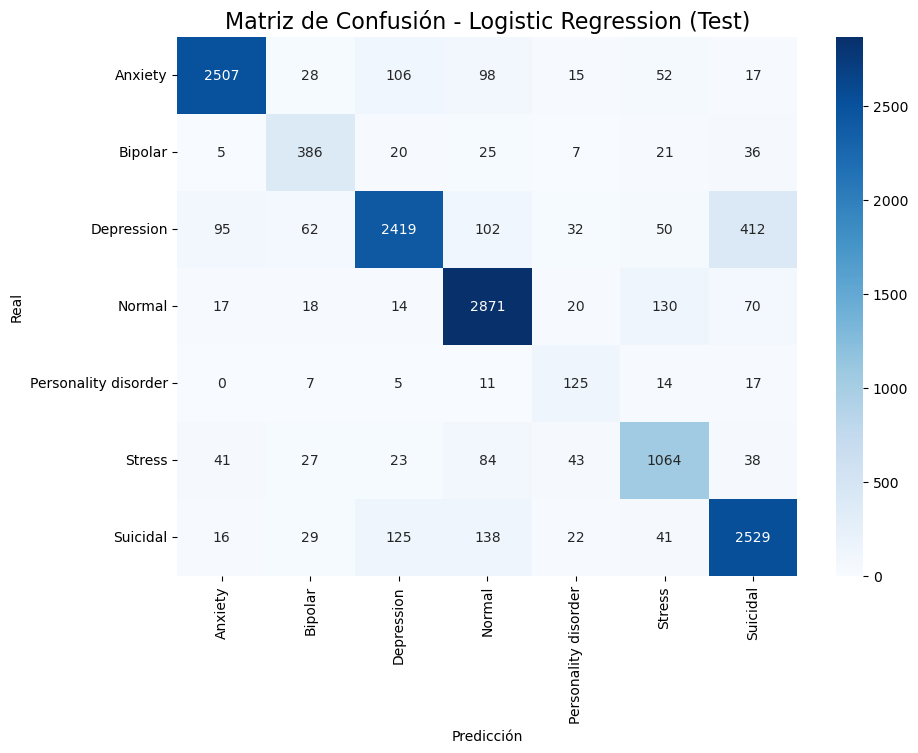


--- SVM ---
Precisión promedio de validación cruzada: 0.9046
Desviación estándar: 0.0039
Precisión: 0.8512
Precisión ponderada: 0.8543
Recall ponderado: 0.8512
F1-score ponderado: 0.8509

Reporte de Clasificación en el conjunto de test:
                       precision    recall  f1-score   support

             Anxiety       0.94      0.89      0.91      2823
             Bipolar       0.70      0.75      0.73       500
          Depression       0.89      0.77      0.82      3172
              Normal       0.86      0.92      0.89      3140
Personality disorder       0.64      0.55      0.59       179
              Stress       0.77      0.79      0.78      1320
            Suicidal       0.80      0.89      0.84      2900

            accuracy                           0.85     14034
           macro avg       0.80      0.79      0.80     14034
        weighted avg       0.85      0.85      0.85     14034



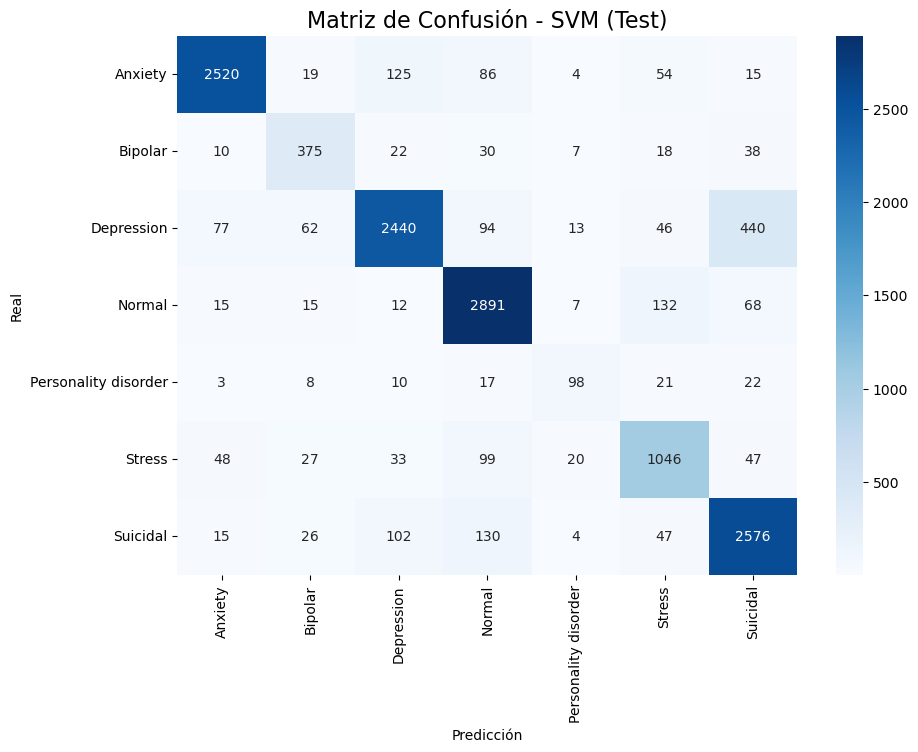


--- Naive Bayes ---
Precisión promedio de validación cruzada: 0.6365
Desviación estándar: 0.0066
Precisión: 0.4892
Precisión ponderada: 0.7839
Recall ponderado: 0.4892
F1-score ponderado: 0.5434

Reporte de Clasificación en el conjunto de test:
                       precision    recall  f1-score   support

             Anxiety       0.83      0.37      0.51      2823
             Bipolar       0.14      0.91      0.24       500
          Depression       0.84      0.38      0.52      3172
              Normal       0.97      0.30      0.46      3140
Personality disorder       0.06      0.87      0.12       179
              Stress       0.71      0.58      0.64      1320
            Suicidal       0.66      0.79      0.72      2900

            accuracy                           0.49     14034
           macro avg       0.60      0.60      0.46     14034
        weighted avg       0.78      0.49      0.54     14034



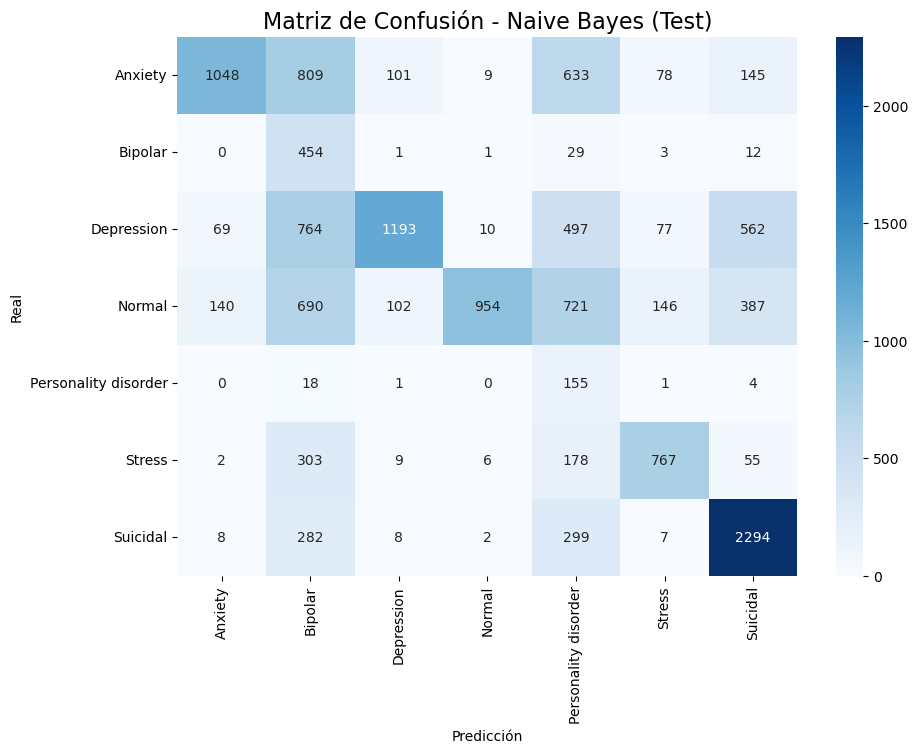


--- KNN ---
Precisión promedio de validación cruzada: 0.5721
Desviación estándar: 0.0424
Precisión: 0.3594
Precisión ponderada: 0.6581
Recall ponderado: 0.3594
F1-score ponderado: 0.3139

Reporte de Clasificación en el conjunto de test:
                       precision    recall  f1-score   support

             Anxiety       0.78      0.15      0.25      2823
             Bipolar       0.36      0.14      0.20       500
          Depression       0.87      0.08      0.14      3172
              Normal       0.86      0.24      0.38      3140
Personality disorder       0.15      0.17      0.16       179
              Stress       0.19      0.78      0.31      1320
            Suicidal       0.38      0.86      0.53      2900

            accuracy                           0.36     14034
           macro avg       0.51      0.35      0.28     14034
        weighted avg       0.66      0.36      0.31     14034



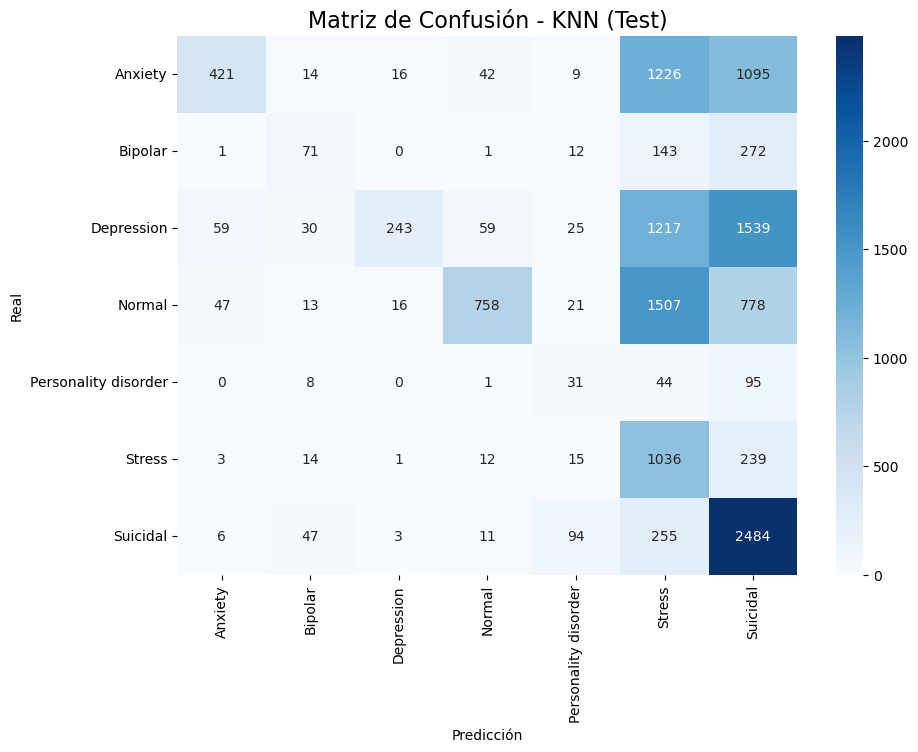

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
import re
import string
from nltk.stem import WordNetLemmatizer
import nltk

# Asegurar que los gráficos se muestren en el Notebook
%matplotlib inline

# Crear el objeto lemmatizer
lemmatizer = WordNetLemmatizer()

# Función para preprocesar el texto (eliminar signos de puntuación, convertir a minúsculas, etc.)
def preprocesar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)
    texto = re.sub(r'<.*?>+', '', texto)
    texto = re.sub(r'[%s]' % re.escape(string.punctuation), '', texto)
    texto = re.sub(r'\n', '', texto)
    texto = re.sub(r'\w*\d\w*', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    # Aplicar lemmatization
    texto = ' '.join([lemmatizer.lemmatize(word) for word in texto.split()])
    return texto

# Cargar el dataset y preprocesar
df = pd.read_csv('Combined_Balanced_Data(3).csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(subset=['statement'], inplace=True)

# Aplicar preprocesamiento
df['cleaned_statement'] = df['statement'].apply(lambda x: preprocesar_texto(x))

# Separar las características (X) y la variable objetivo (y)
X = df['cleaned_statement']
y = df['status']

# Codificar las etiquetas (nombres de clases a números)
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE solo en los datos de entrenamiento
smote = SMOTE(random_state=42)
vectorizer = TfidfVectorizer()

# Convertimos el texto a TF-IDF antes de aplicar SMOTE
X_entrenamiento_tfidf = vectorizer.fit_transform(X_entrenamiento)

# Aplicar SMOTE para reequilibrar el conjunto de entrenamiento
X_entrenamiento_res, y_entrenamiento_res = smote.fit_resample(X_entrenamiento_tfidf, y_entrenamiento)

# Definir validación cruzada con 5 pliegues
skf = StratifiedKFold(n_splits=5)

# Modelos a probar
modelos = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
}

# Probar cada modelo
for nombre, modelo in modelos.items():
    print(f"\n--- {nombre} ---")
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),  # Elimina stopwords
        ('clf', modelo)
    ])
    
    # 1. VALIDACIÓN CRUZADA EN EL CONJUNTO DE ENTRENAMIENTO REEQUILIBRADO
    cv_scores = cross_val_score(modelo, X_entrenamiento_res, y_entrenamiento_res, cv=skf, scoring='accuracy')
    print(f"Precisión promedio de validación cruzada: {cv_scores.mean():.4f}")
    print(f"Desviación estándar: {cv_scores.std():.4f}")
    
    # 2. ENTRENAMIENTO FINAL CON EL CONJUNTO COMPLETO DE ENTRENAMIENTO REEQUILIBRADO
    modelo.fit(X_entrenamiento_res, y_entrenamiento_res)
    
    # Transformamos el conjunto de prueba a TF-IDF
    X_prueba_tfidf = vectorizer.transform(X_prueba)
    
    # 3. EVALUACIÓN FINAL EN EL CONJUNTO DE PRUEBA
    y_pred_test = modelo.predict(X_prueba_tfidf)
    print(f"Precisión: {accuracy_score(y_prueba, y_pred_test):.4f}")
    print(f"Precisión ponderada: {precision_score(y_prueba, y_pred_test, average='weighted'):.4f}")
    print(f"Recall ponderado: {recall_score(y_prueba, y_pred_test, average='weighted'):.4f}")
    print(f"F1-score ponderado: {f1_score(y_prueba, y_pred_test, average='weighted'):.4f}")
    
    # Mostrar el reporte de clasificación completo
    print("\nReporte de Clasificación en el conjunto de test:\n", classification_report(y_prueba, y_pred_test, target_names=le.classes_))

    # Matriz de confusión
    matriz_confusion_test = confusion_matrix(y_prueba, y_pred_test)
    plt.figure(figsize=(10, 7))
    sns.heatmap(matriz_confusion_test, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Matriz de Confusión - {nombre} (Test)", fontsize=16)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()


RANDOM FOREST CON HIPERPARÁMETROS

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Precisión: 0.8090
Precisión ponderada: 0.8259
Recall ponderado: 0.8090
F1-score ponderado: 0.8047

Reporte de Clasificación por Clase:
                       precision    recall  f1-score   support

             Anxiety       0.89      0.87      0.88      2823
             Bipolar       0.71      0.51      0.59       500
          Depression       0.90      0.73      0.80      3172
              Normal       0.85      0.90      0.88      3140
Personality disorder       0.85      0.06      0.11       179
              Stress       0.87      0.66      0.75      1320
            Suicidal       0.65      0.90      0.76      2900

            accuracy                           0.81     14034
           macro avg       0.82      0.66      0.68     14034
        weighted avg       0.83      0.81      0.80     14034



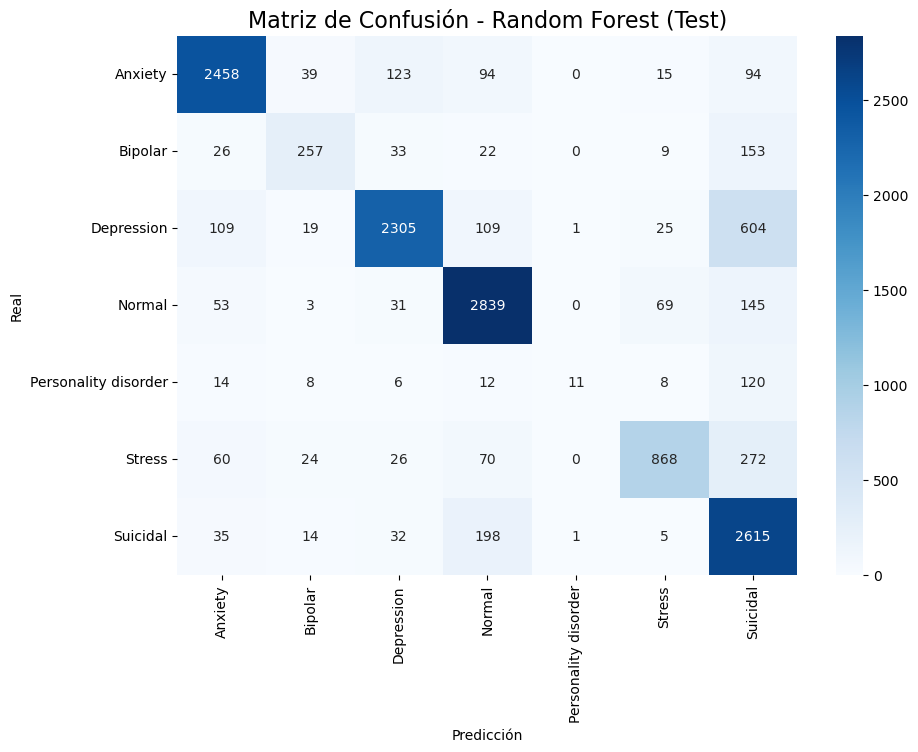

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import re
import string
from nltk.stem import WordNetLemmatizer
import nltk

# Crear el objeto lemmatizer
lemmatizer = WordNetLemmatizer()

# Función para preprocesar el texto
def preprocesar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)
    texto = re.sub(r'<.*?>+', '', texto)
    texto = re.sub(r'[%s]' % re.escape(string.punctuation), '', texto)
    texto = re.sub(r'\n', '', texto)
    texto = re.sub(r'\w*\d\w*', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    texto = ' '.join([lemmatizer.lemmatize(word) for word in texto.split()])
    return texto

# Cargar el dataset y preprocesar
df = pd.read_csv('Combined_Balanced_Data(3).csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(subset=['statement'], inplace=True)

# Aplicar preprocesamiento
df['cleaned_statement'] = df['statement'].apply(lambda x: preprocesar_texto(x))

# Separar las características (X) y la variable objetivo (y)
X = df['cleaned_statement']
y = df['status']

# Codificar las etiquetas
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir los datos
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE y vectorización
smote = SMOTE(random_state=42)
vectorizer = TfidfVectorizer()
X_entrenamiento_tfidf = vectorizer.fit_transform(X_entrenamiento)
X_entrenamiento_res, y_entrenamiento_res = smote.fit_resample(X_entrenamiento_tfidf, y_entrenamiento)

# Parámetros de GridSearch para Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Modelo y GridSearchCV
modelo = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy', n_jobs=-1)
grid_search.fit(X_entrenamiento_res, y_entrenamiento_res)

# Mejor modelo
mejor_modelo = grid_search.best_estimator_

# Evaluación en el conjunto de prueba
X_prueba_tfidf = vectorizer.transform(X_prueba)
y_pred_test = mejor_modelo.predict(X_prueba_tfidf)

# Reporte de métricas
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Precisión: {accuracy_score(y_prueba, y_pred_test):.4f}")
print(f"Precisión ponderada: {precision_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"Recall ponderado: {recall_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"F1-score ponderado: {f1_score(y_prueba, y_pred_test, average='weighted'):.4f}")

# Métricas por clase
print("\nReporte de Clasificación por Clase:\n", classification_report(y_prueba, y_pred_test, target_names=le.classes_))

# Matriz de confusión
matriz_confusion_test = confusion_matrix(y_prueba, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_test, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Matriz de Confusión - Random Forest (Test)", fontsize=16)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


REGRESIÓN LOGÍSTICA CON HIPERPARÁMETROS

Mejores parámetros: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Precisión: 0.8467
Precisión ponderada: 0.8495
Recall ponderado: 0.8467
F1-score ponderado: 0.8469

Reporte de Clasificación por Clase:
                       precision    recall  f1-score   support

             Anxiety       0.93      0.89      0.91      2823
             Bipolar       0.73      0.76      0.75       500
          Depression       0.87      0.77      0.82      3172
              Normal       0.87      0.90      0.88      3140
Personality disorder       0.55      0.61      0.58       179
              Stress       0.76      0.79      0.78      1320
            Suicidal       0.81      0.88      0.84      2900

            accuracy                           0.85     14034
           macro avg       0.79      0.80      0.79     14034
        weighted avg       0.85      0.85      0.85     14034



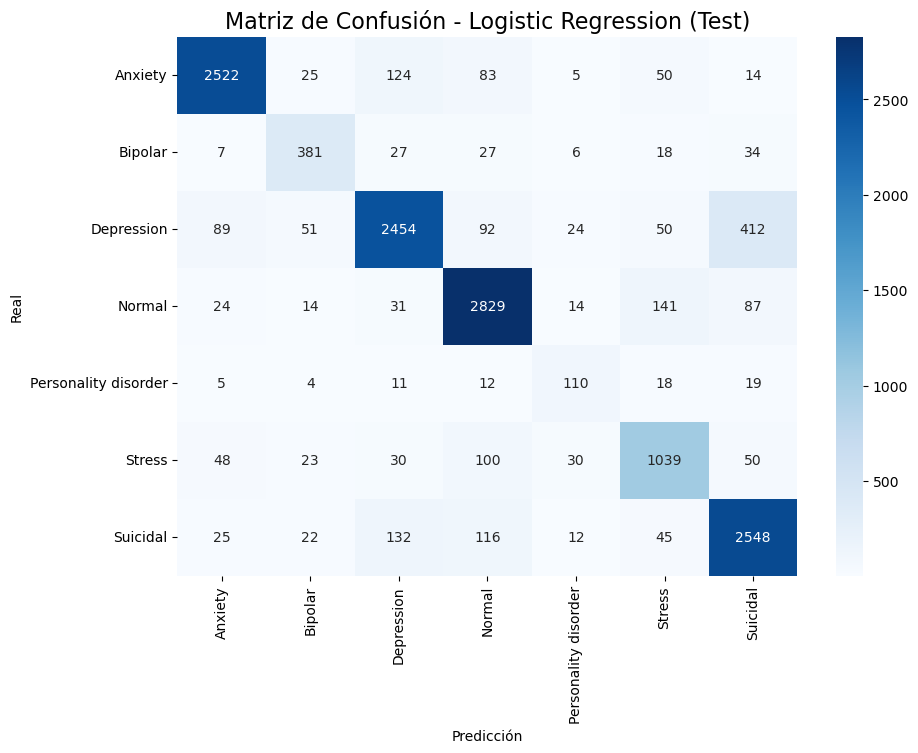

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import re
import string
from nltk.stem import WordNetLemmatizer
import nltk

# Crear el objeto lemmatizer
lemmatizer = WordNetLemmatizer()

# Función para preprocesar el texto
def preprocesar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)
    texto = re.sub(r'<.*?>+', '', texto)
    texto = re.sub(r'[%s]' % re.escape(string.punctuation), '', texto)
    texto = re.sub(r'\n', '', texto)
    texto = re.sub(r'\w*\d\w*', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    texto = ' '.join([lemmatizer.lemmatize(word) for word in texto.split()])
    return texto

# Cargar el dataset y preprocesar
df = pd.read_csv('Combined_Balanced_Data(3).csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(subset=['statement'], inplace=True)

# Aplicar preprocesamiento
df['cleaned_statement'] = df['statement'].apply(lambda x: preprocesar_texto(x))

# Separar las características (X) y la variable objetivo (y)
X = df['cleaned_statement']
y = df['status']

# Codificar las etiquetas
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir los datos
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE y vectorización
smote = SMOTE(random_state=42)
vectorizer = TfidfVectorizer()
X_entrenamiento_tfidf = vectorizer.fit_transform(X_entrenamiento)
X_entrenamiento_res, y_entrenamiento_res = smote.fit_resample(X_entrenamiento_tfidf, y_entrenamiento)

# Parámetros de GridSearch para Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Modelo y GridSearchCV
modelo = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy', n_jobs=-1)
grid_search.fit(X_entrenamiento_res, y_entrenamiento_res)

# Mejor modelo
mejor_modelo = grid_search.best_estimator_

# Evaluación en el conjunto de prueba
X_prueba_tfidf = vectorizer.transform(X_prueba)
y_pred_test = mejor_modelo.predict(X_prueba_tfidf)

# Reporte de métricas
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Precisión: {accuracy_score(y_prueba, y_pred_test):.4f}")
print(f"Precisión ponderada: {precision_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"Recall ponderado: {recall_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"F1-score ponderado: {f1_score(y_prueba, y_pred_test, average='weighted'):.4f}")

# Métricas por clase
print("\nReporte de Clasificación por Clase:\n", classification_report(y_prueba, y_pred_test, target_names=le.classes_))

# Matriz de confusión
matriz_confusion_test = confusion_matrix(y_prueba, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_test, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Matriz de Confusión - Logistic Regression (Test)", fontsize=16)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


XGBOOST CON HIPERPARÁMETROS

C:\Users\Alvaro\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:07:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Precisión: 0.8540
Precisión ponderada: 0.8576
Recall ponderado: 0.8540
F1-score ponderado: 0.8531

Reporte de Clasificación por Clase:
                       precision    recall  f1-score   support

             Anxiety       0.95      0.88      0.91      2823
             Bipolar       0.86      0.74      0.79       500
          Depression       0.89      0.78      0.83      3172
              Normal       0.83      0.94      0.88      3140
Personality disorder       0.74      0.49      0.59       179
              Stress       0.80      0.80      0.80      1320
            Suicidal       0.80      0.88      0.84      2900

            accuracy                           0.85     14034
           macro avg       0.84      0.79      0.81     14034
        weighted avg       0.86      0.85      0.85     14034



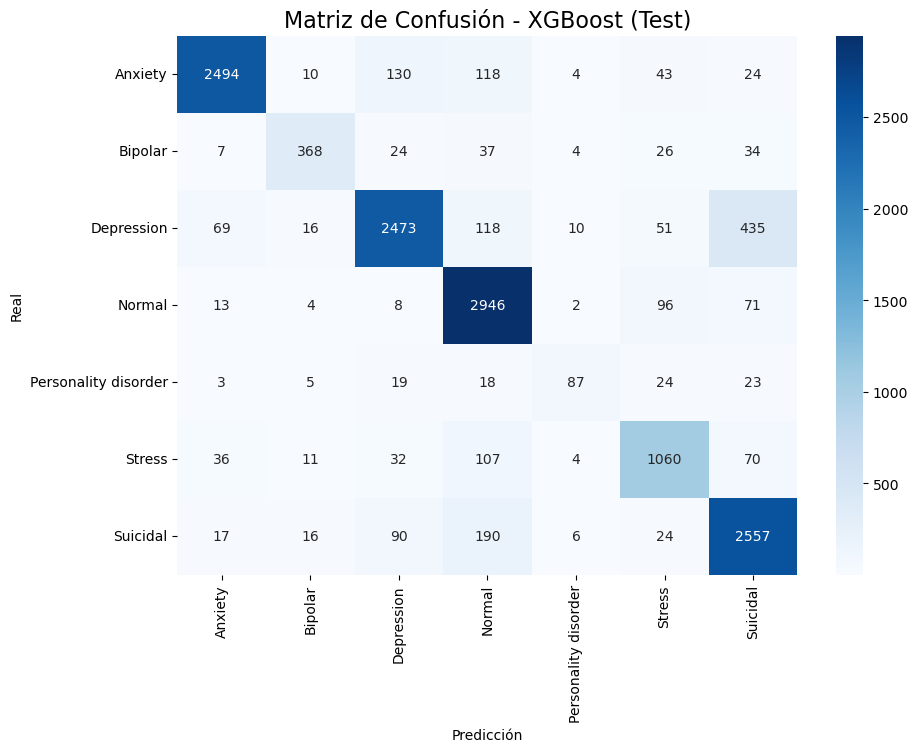

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import re
import string
from nltk.stem import WordNetLemmatizer
import nltk

# Crear el objeto lemmatizer
lemmatizer = WordNetLemmatizer()

# Función para preprocesar el texto
def preprocesar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)
    texto = re.sub(r'<.*?>+', '', texto)
    texto = re.sub(r'[%s]' % re.escape(string.punctuation), '', texto)
    texto = re.sub(r'\n', '', texto)
    texto = re.sub(r'\w*\d\w*', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    texto = ' '.join([lemmatizer.lemmatize(word) for word in texto.split()])
    return texto

# Cargar el dataset y preprocesar
df = pd.read_csv('Combined_Balanced_Data(3).csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(subset=['statement'], inplace=True)

# Aplicar preprocesamiento
df['cleaned_statement'] = df['statement'].apply(lambda x: preprocesar_texto(x))

# Separar las características (X) y la variable objetivo (y)
X = df['cleaned_statement']
y = df['status']

# Codificar las etiquetas
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir los datos
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE y vectorización
smote = SMOTE(random_state=42)
vectorizer = TfidfVectorizer()
X_entrenamiento_tfidf = vectorizer.fit_transform(X_entrenamiento)
X_entrenamiento_res, y_entrenamiento_res = smote.fit_resample(X_entrenamiento_tfidf, y_entrenamiento)

# Parámetros de GridSearch para XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Modelo y GridSearchCV
modelo = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy', n_jobs=-1)
grid_search.fit(X_entrenamiento_res, y_entrenamiento_res)

# Mejor modelo
mejor_modelo = grid_search.best_estimator_

# Evaluación en el conjunto de prueba
X_prueba_tfidf = vectorizer.transform(X_prueba)
y_pred_test = mejor_modelo.predict(X_prueba_tfidf)

# Reporte de métricas
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Precisión: {accuracy_score(y_prueba, y_pred_test):.4f}")
print(f"Precisión ponderada: {precision_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"Recall ponderado: {recall_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"F1-score ponderado: {f1_score(y_prueba, y_pred_test, average='weighted'):.4f}")

# Métricas por clase
print("\nReporte de Clasificación por Clase:\n", classification_report(y_prueba, y_pred_test, target_names=le.classes_))

# Matriz de confusión
matriz_confusion_test = confusion_matrix(y_prueba, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_test, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Matriz de Confusión - XGBoost (Test)", fontsize=16)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


SVM CON HIPERPARÁMETROS

Mejores parámetros: {'C': 10, 'kernel': 'rbf'}
Precisión: 0.8544
Precisión ponderada: 0.8560
Recall ponderado: 0.8544
F1-score ponderado: 0.8524

Reporte de Clasificación por Clase:
                       precision    recall  f1-score   support

             Anxiety       0.93      0.90      0.91      2823
             Bipolar       0.85      0.68      0.76       500
          Depression       0.87      0.79      0.83      3172
              Normal       0.84      0.94      0.89      3140
Personality disorder       0.84      0.40      0.54       179
              Stress       0.83      0.77      0.80      1320
            Suicidal       0.81      0.88      0.84      2900

            accuracy                           0.85     14034
           macro avg       0.85      0.77      0.80     14034
        weighted avg       0.86      0.85      0.85     14034



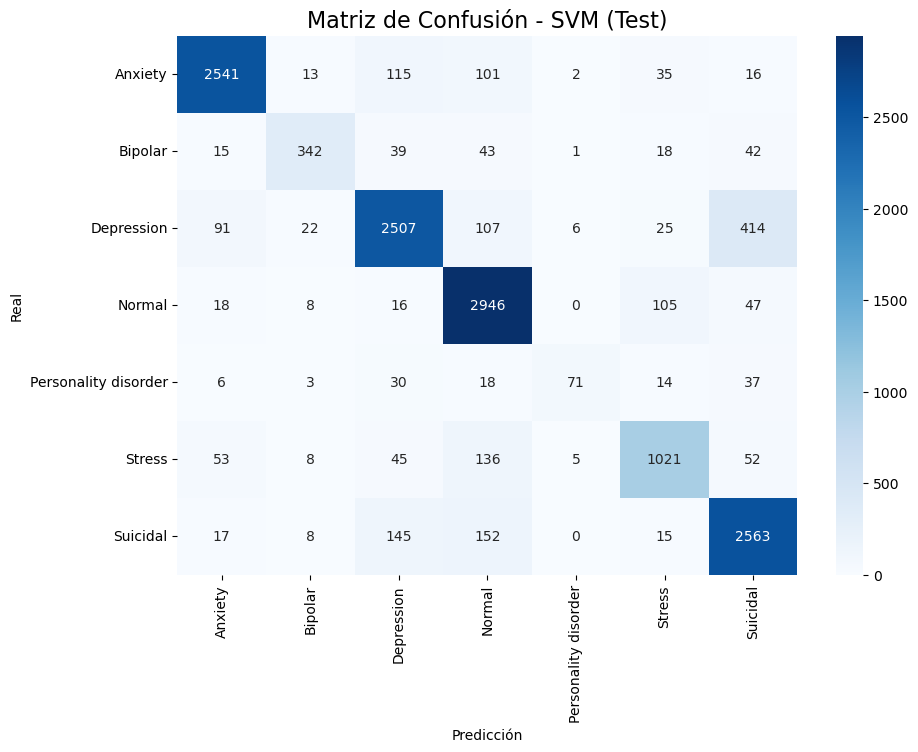

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import re
import string
from nltk.stem import WordNetLemmatizer
import nltk

# Crear el objeto lemmatizer
lemmatizer = WordNetLemmatizer()

# Función para preprocesar el texto
def preprocesar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)
    texto = re.sub(r'<.*?>+', '', texto)
    texto = re.sub(r'[%s]' % re.escape(string.punctuation), '', texto)
    texto = re.sub(r'\n', '', texto)
    texto = re.sub(r'\w*\d\w*', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    texto = ' '.join([lemmatizer.lemmatize(word) for word in texto.split()])
    return texto

# Cargar el dataset y preprocesar
df = pd.read_csv('Combined_Balanced_Data(3).csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(subset=['statement'], inplace=True)

# Aplicar preprocesamiento
df['cleaned_statement'] = df['statement'].apply(lambda x: preprocesar_texto(x))

# Separar las características (X) y la variable objetivo (y)
X = df['cleaned_statement']
y = df['status']

# Codificar las etiquetas
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir los datos
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE y vectorización
smote = SMOTE(random_state=42)
vectorizer = TfidfVectorizer()
X_entrenamiento_tfidf = vectorizer.fit_transform(X_entrenamiento)
X_entrenamiento_res, y_entrenamiento_res = smote.fit_resample(X_entrenamiento_tfidf, y_entrenamiento)

# Parámetros de GridSearch para SVM
param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
}

# Modelo y GridSearchCV
modelo = SVC()
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy', n_jobs=-1)
grid_search.fit(X_entrenamiento_res, y_entrenamiento_res)

# Mejor modelo
mejor_modelo = grid_search.best_estimator_

# Evaluación en el conjunto de prueba
X_prueba_tfidf = vectorizer.transform(X_prueba)
y_pred_test = mejor_modelo.predict(X_prueba_tfidf)

# Reporte de métricas
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Precisión: {accuracy_score(y_prueba, y_pred_test):.4f}")
print(f"Precisión ponderada: {precision_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"Recall ponderado: {recall_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"F1-score ponderado: {f1_score(y_prueba, y_pred_test, average='weighted'):.4f}")

# Métricas por clase
print("\nReporte de Clasificación por Clase:\n", classification_report(y_prueba, y_pred_test, target_names=le.classes_))

# Matriz de confusión
matriz_confusion_test = confusion_matrix(y_prueba, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_test, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Matriz de Confusión - SVM (Test)", fontsize=16)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


RANDOM FOREST CON HIPERPARÁMETROS Y SIN "PERSONALITY DISORDER"

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Precisión: 0.8139
Precisión ponderada: 0.8265
Recall ponderado: 0.8139
F1-score ponderado: 0.8120

Reporte de Clasificación por Clase:
               precision    recall  f1-score   support

     Anxiety       0.88      0.87      0.88      2823
     Bipolar       0.71      0.50      0.59       500
  Depression       0.89      0.72      0.80      3172
      Normal       0.84      0.91      0.87      3140
      Stress       0.88      0.63      0.73      1320
    Suicidal       0.68      0.90      0.77      2900

    accuracy                           0.81     13855
   macro avg       0.81      0.75      0.77     13855
weighted avg       0.83      0.81      0.81     13855



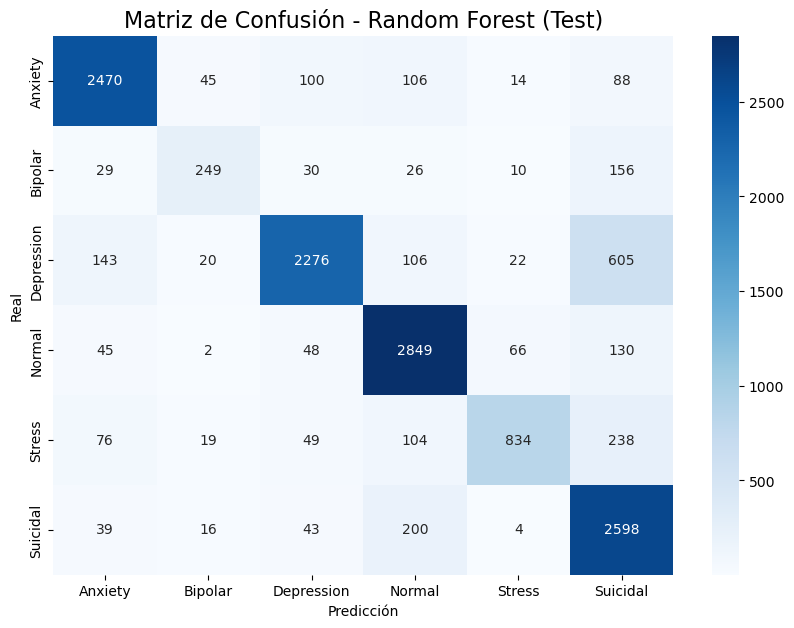

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import re
import string
from nltk.stem import WordNetLemmatizer
import nltk

# Crear el objeto lemmatizer
lemmatizer = WordNetLemmatizer()

# Función para preprocesar el texto
def preprocesar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)
    texto = re.sub(r'<.*?>+', '', texto)
    texto = re.sub(r'[%s]' % re.escape(string.punctuation), '', texto)
    texto = re.sub(r'\n', '', texto)
    texto = re.sub(r'\w*\d\w*', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    texto = ' '.join([lemmatizer.lemmatize(word) for word in texto.split()])
    return texto

# Cargar el dataset y preprocesar
df = pd.read_csv('Combined_Balanced_Data(3).csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(subset=['statement'], inplace=True)

# Eliminar la clase "Personality disorder"
df = df[df['status'] != 'Personality disorder']

# Aplicar preprocesamiento
df['cleaned_statement'] = df['statement'].apply(lambda x: preprocesar_texto(x))

# Separar las características (X) y la variable objetivo (y)
X = df['cleaned_statement']
y = df['status']

# Codificar las etiquetas
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir los datos
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE y vectorización
smote = SMOTE(random_state=42)
vectorizer = TfidfVectorizer()
X_entrenamiento_tfidf = vectorizer.fit_transform(X_entrenamiento)
X_entrenamiento_res, y_entrenamiento_res = smote.fit_resample(X_entrenamiento_tfidf, y_entrenamiento)

# Parámetros de GridSearch para Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Modelo y GridSearchCV
modelo = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy', n_jobs=-1)
grid_search.fit(X_entrenamiento_res, y_entrenamiento_res)

# Mejor modelo
mejor_modelo = grid_search.best_estimator_

# Evaluación en el conjunto de prueba
X_prueba_tfidf = vectorizer.transform(X_prueba)
y_pred_test = mejor_modelo.predict(X_prueba_tfidf)

# Reporte de métricas
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Precisión: {accuracy_score(y_prueba, y_pred_test):.4f}")
print(f"Precisión ponderada: {precision_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"Recall ponderado: {recall_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"F1-score ponderado: {f1_score(y_prueba, y_pred_test, average='weighted'):.4f}")

# Métricas por clase
print("\nReporte de Clasificación por Clase:\n", classification_report(y_prueba, y_pred_test, target_names=le.classes_))

# Matriz de confusión
matriz_confusion_test = confusion_matrix(y_prueba, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_test, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Matriz de Confusión - Random Forest (Test)", fontsize=16)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


REGRESIÓN LOGÍSTICA CON HIPERPARÁMETROS Y SIN "PERSONALITY DISORDER"

Mejores parámetros: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Precisión: 0.8573
Precisión ponderada: 0.8589
Recall ponderado: 0.8573
F1-score ponderado: 0.8567

Reporte de Clasificación por Clase:
               precision    recall  f1-score   support

     Anxiety       0.93      0.90      0.91      2823
     Bipolar       0.74      0.76      0.75       500
  Depression       0.87      0.78      0.82      3172
      Normal       0.87      0.93      0.90      3140
      Stress       0.81      0.77      0.79      1320
    Suicidal       0.81      0.89      0.85      2900

    accuracy                           0.86     13855
   macro avg       0.84      0.84      0.84     13855
weighted avg       0.86      0.86      0.86     13855



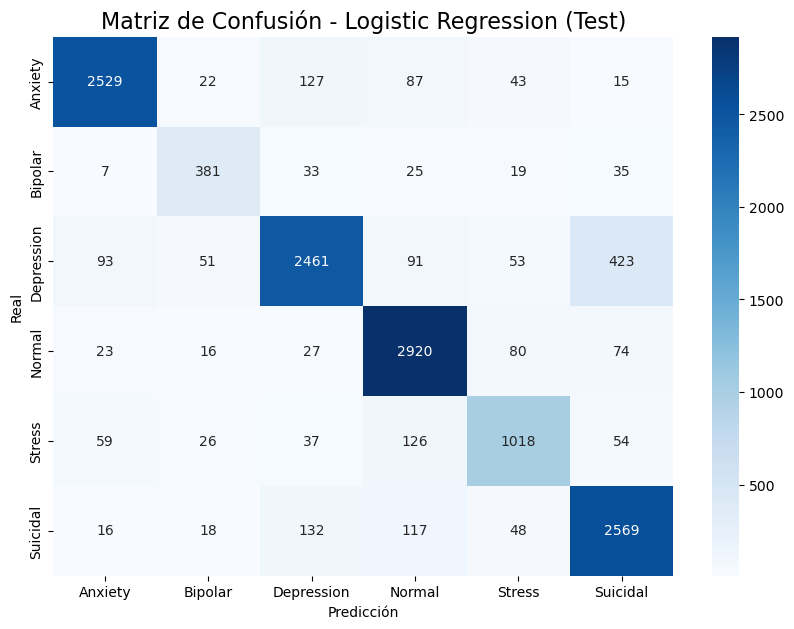

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import re
import string
from nltk.stem import WordNetLemmatizer
import nltk

# Crear el objeto lemmatizer
lemmatizer = WordNetLemmatizer()

# Función para preprocesar el texto
def preprocesar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)
    texto = re.sub(r'<.*?>+', '', texto)
    texto = re.sub(r'[%s]' % re.escape(string.punctuation), '', texto)
    texto = re.sub(r'\n', '', texto)
    texto = re.sub(r'\w*\d\w*', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    texto = ' '.join([lemmatizer.lemmatize(word) for word in texto.split()])
    return texto

# Cargar el dataset y preprocesar
df = pd.read_csv('Combined_Balanced_Data(3).csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(subset=['statement'], inplace=True)

# Eliminar la clase "Personality disorder"
df = df[df['status'] != 'Personality disorder']

# Aplicar preprocesamiento
df['cleaned_statement'] = df['statement'].apply(lambda x: preprocesar_texto(x))

# Separar las características (X) y la variable objetivo (y)
X = df['cleaned_statement']
y = df['status']

# Codificar las etiquetas
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir los datos
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE y vectorización
smote = SMOTE(random_state=42)
vectorizer = TfidfVectorizer()
X_entrenamiento_tfidf = vectorizer.fit_transform(X_entrenamiento)
X_entrenamiento_res, y_entrenamiento_res = smote.fit_resample(X_entrenamiento_tfidf, y_entrenamiento)

# Parámetros de GridSearch para Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Modelo y GridSearchCV
modelo = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy', n_jobs=-1)
grid_search.fit(X_entrenamiento_res, y_entrenamiento_res)

# Mejor modelo
mejor_modelo = grid_search.best_estimator_

# Evaluación en el conjunto de prueba
X_prueba_tfidf = vectorizer.transform(X_prueba)
y_pred_test = mejor_modelo.predict(X_prueba_tfidf)

# Reporte de métricas
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Precisión: {accuracy_score(y_prueba, y_pred_test):.4f}")
print(f"Precisión ponderada: {precision_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"Recall ponderado: {recall_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"F1-score ponderado: {f1_score(y_prueba, y_pred_test, average='weighted'):.4f}")

# Métricas por clase
print("\nReporte de Clasificación por Clase:\n", classification_report(y_prueba, y_pred_test, target_names=le.classes_))

# Matriz de confusión
matriz_confusion_test = confusion_matrix(y_prueba, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_test, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Matriz de Confusión - Logistic Regression (Test)", fontsize=16)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


XGBOOST CON HIPERPARÁMETROS Y SIN "PERSONALITY DISORDER"

C:\Users\Alvaro\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:10:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Precisión: 0.8580
Precisión ponderada: 0.8621
Recall ponderado: 0.8580
F1-score ponderado: 0.8577

Reporte de Clasificación por Clase:
               precision    recall  f1-score   support

     Anxiety       0.95      0.88      0.91      2823
     Bipolar       0.87      0.74      0.80       500
  Depression       0.89      0.78      0.83      3172
      Normal       0.84      0.94      0.89      3140
      Stress       0.80      0.79      0.80      1320
    Suicidal       0.80      0.88      0.84      2900

    accuracy                           0.86     13855
   macro avg       0.86      0.84      0.84     13855
weighted avg       0.86      0.86      0.86     13855



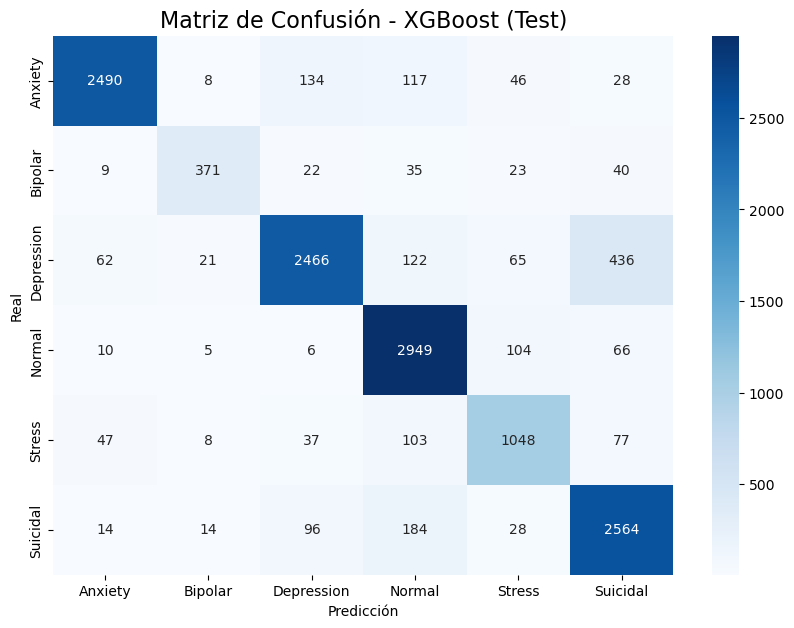

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import re
import string
from nltk.stem import WordNetLemmatizer
import nltk

# Crear el objeto lemmatizer
lemmatizer = WordNetLemmatizer()

# Función para preprocesar el texto
def preprocesar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)
    texto = re.sub(r'<.*?>+', '', texto)
    texto = re.sub(r'[%s]' % re.escape(string.punctuation), '', texto)
    texto = re.sub(r'\n', '', texto)
    texto = re.sub(r'\w*\d\w*', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    texto = ' '.join([lemmatizer.lemmatize(word) for word in texto.split()])
    return texto

# Cargar el dataset y preprocesar
df = pd.read_csv('Combined_Balanced_Data(3).csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(subset=['statement'], inplace=True)

# Eliminar la clase "Personality disorder"
df = df[df['status'] != 'Personality disorder']

# Aplicar preprocesamiento
df['cleaned_statement'] = df['statement'].apply(lambda x: preprocesar_texto(x))

# Separar las características (X) y la variable objetivo (y)
X = df['cleaned_statement']
y = df['status']

# Codificar las etiquetas
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir los datos
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE y vectorización
smote = SMOTE(random_state=42)
vectorizer = TfidfVectorizer()
X_entrenamiento_tfidf = vectorizer.fit_transform(X_entrenamiento)
X_entrenamiento_res, y_entrenamiento_res = smote.fit_resample(X_entrenamiento_tfidf, y_entrenamiento)

# Parámetros de GridSearch para XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Modelo y GridSearchCV
modelo = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy', n_jobs=-1)
grid_search.fit(X_entrenamiento_res, y_entrenamiento_res)

# Mejor modelo
mejor_modelo = grid_search.best_estimator_

# Evaluación en el conjunto de prueba
X_prueba_tfidf = vectorizer.transform(X_prueba)
y_pred_test = mejor_modelo.predict(X_prueba_tfidf)

# Reporte de métricas
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Precisión: {accuracy_score(y_prueba, y_pred_test):.4f}")
print(f"Precisión ponderada: {precision_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"Recall ponderado: {recall_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"F1-score ponderado: {f1_score(y_prueba, y_pred_test, average='weighted'):.4f}")

# Métricas por clase
print("\nReporte de Clasificación por Clase:\n", classification_report(y_prueba, y_pred_test, target_names=le.classes_))

# Matriz de confusión
matriz_confusion_test = confusion_matrix(y_prueba, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_test, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Matriz de Confusión - XGBoost (Test)", fontsize=16)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


SVM CON HIPERPARÁMETROS Y SIN "PERSONALITY DISORDER"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mejores parámetros: {'C': 10, 'kernel': 'rbf'}
Precisión: 0.8609
Precisión ponderada: 0.8632
Recall ponderado: 0.8609
F1-score ponderado: 0.8599

Reporte de Clasificación por Clase:
               precision    recall  f1-score   support

     Anxiety       0.93      0.90      0.92      2823
     Bipolar       0.84      0.68      0.75       500
  Depression       0.88      0.79      0.83      3172
      Normal       0.85      0.94      0.89      3140
      Stress       0.86      0.76      0.81      1320
    Suicidal       0.80      0.89      0.85      2900

    accuracy                           0.86     13855
   macro avg       0.86      0.83      0.84     13855
weighted avg       0.86      0.86      0.86     13855



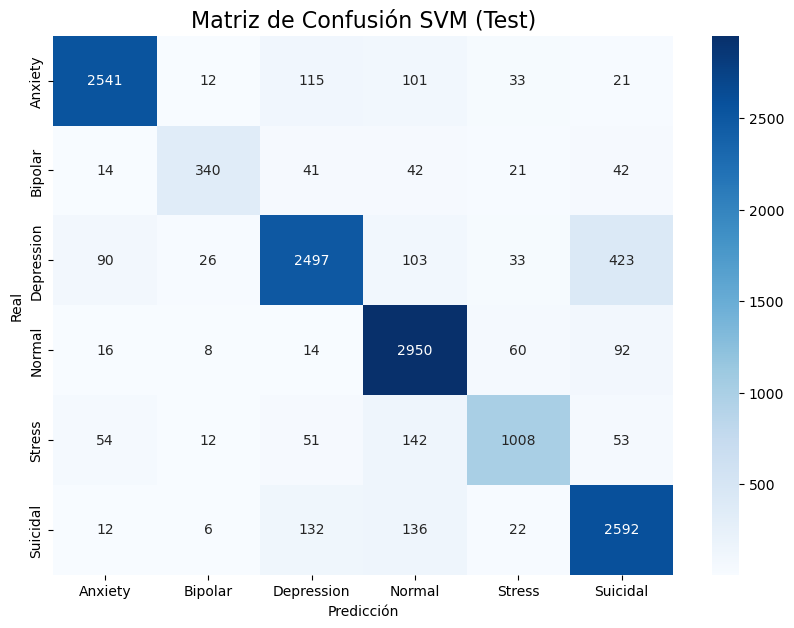

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import re
import string
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))


# Crear el objeto lemmatizer
lemmatizer = WordNetLemmatizer()

# Función para preprocesar el texto
def preprocesar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)
    texto = re.sub(r'<.*?>+', '', texto)
    texto = re.sub(r'[%s]' % re.escape(string.punctuation), '', texto)
    texto = re.sub(r'\n', '', texto)
    texto = re.sub(r'\w*\d\w*', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    texto = ' '.join([lemmatizer.lemmatize(word) for word in texto.split()])
    return texto

# Cargar el dataset y preprocesar
df = pd.read_csv('Combined_Balanced_Data(3).csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(subset=['statement'], inplace=True)

# Eliminar la clase "Personality disorder"
df = df[df['status'] != 'Personality disorder']

# Aplicar preprocesamiento
df['cleaned_statement'] = df['statement'].apply(lambda x: preprocesar_texto(x))

# Separar las características (X) y la variable objetivo (y)
X = df['cleaned_statement']
y = df['status']

# Codificar las etiquetas
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir los datos
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE y vectorización
smote = SMOTE(random_state=42)
vectorizer = TfidfVectorizer()
X_entrenamiento_tfidf = vectorizer.fit_transform(X_entrenamiento)
X_entrenamiento_res, y_entrenamiento_res = smote.fit_resample(X_entrenamiento_tfidf, y_entrenamiento)

# Parámetros de GridSearch para SVM
param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
}

# Modelo y GridSearchCV
modelo = SVC()
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy', n_jobs=-1)
grid_search.fit(X_entrenamiento_res, y_entrenamiento_res)

# Mejor modelo
mejor_modelo = grid_search.best_estimator_

# Evaluación en el conjunto de prueba
X_prueba_tfidf = vectorizer.transform(X_prueba)
y_pred_test = mejor_modelo.predict(X_prueba_tfidf)

# Reporte de métricas
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Precisión: {accuracy_score(y_prueba, y_pred_test):.4f}")
print(f"Precisión ponderada: {precision_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"Recall ponderado: {recall_score(y_prueba, y_pred_test, average='weighted'):.4f}")
print(f"F1-score ponderado: {f1_score(y_prueba, y_pred_test, average='weighted'):.4f}")

# Métricas por clase
print("\nReporte de Clasificación por Clase:\n", classification_report(y_prueba, y_pred_test, target_names=le.classes_))

# Matriz de confusión
matriz_confusion_test = confusion_matrix(y_prueba, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_test, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Matriz de Confusión SVM (Test)", fontsize=16)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
